
# **TOPIC : Cotton Plant Disease Detection Using Convolutional Neural Networks**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Input Data

In [ ]:
train_data_path ='/content/drive/MyDrive/DL/CottonDisease/train'
test_data_path ='/content/drive/MyDrive/DL/CottonDisease/test'

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Data Rescaling

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [ ]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')

Found 106 images belonging to 4 classes.


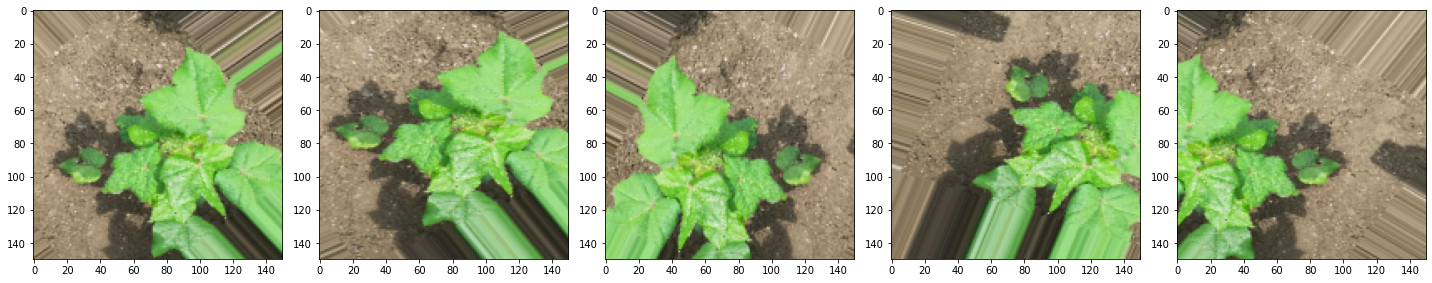

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

CNN Model

In [ ]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') 
])

Training Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_data, epochs=100, verbose=1, validation_data= test_data,)

Epoch 1/100
61/61 [==============================] - 931s 15s/step - loss: 1.2471 - accuracy: 0.4249 - val_loss: 1.2016 - val_accuracy: 0.3868
Epoch 2/100
61/61 [==============================] - 34s 565ms/step - loss: 1.0465 - accuracy: 0.5489 - val_loss: 1.0186 - val_accuracy: 0.5472
Epoch 3/100
61/61 [==============================] - 34s 558ms/step - loss: 0.9222 - accuracy: 0.6207 - val_loss: 1.0634 - val_accuracy: 0.5755
Epoch 4/100
61/61 [==============================] - 34s 554ms/step - loss: 0.8705 - accuracy: 0.6479 - val_loss: 1.1259 - val_accuracy: 0.5094
Epoch 5/100
61/61 [==============================] - 34s 553ms/step - loss: 0.8317 - accuracy: 0.6622 - val_loss: 1.0408 - val_accuracy: 0.5472
Epoch 6/100
61/61 [==============================] - 34s 556ms/step - loss: 0.8149 - accuracy: 0.6627 - val_loss: 0.8358 - val_accuracy: 0.6226
Epoch 7/100
61/61 [==============================] - 34s 552ms/step - loss: 0.7953 - accuracy: 0.6945 - val_loss: 0.8435 - val_accuracy: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Graphs

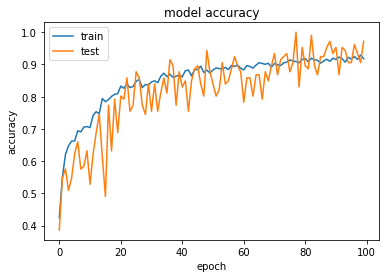

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

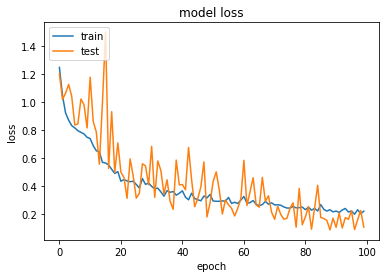

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predictions

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
IMAGE_SIZE =(150,150)

def predict_it(image_location):
  test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
  plt.imshow(test_image)
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  preds=np.argmax(model.predict(test_image))
  if preds==0:
    print("The leaf is diseased cotton leaf")
  elif preds==1:
    print("The leaf is diseased cotton plant")
  elif preds==2:
    print("The leaf is fresh cotton leaf")
  else:
    print("The leaf is fresh cotton plant")

The leaf is diseased cotton leaf


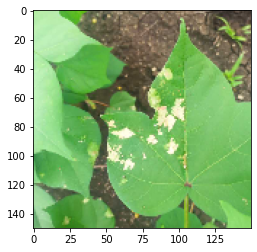

In [ ]:
predict_it('/content/drive/MyDrive/DL/CottonDisease/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg')

The leaf is diseased cotton plant


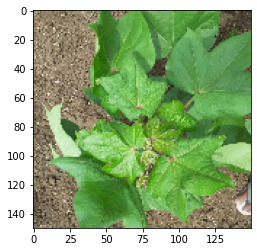

In [ ]:
predict_it('/content/drive/MyDrive/DL/CottonDisease/val/diseased cotton plant/dd (10)_iaip.jpg')

The leaf is fresh cotton leaf


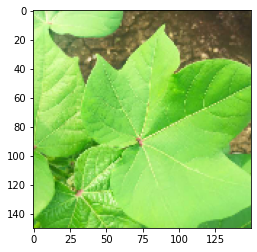

In [ ]:
predict_it('/content/drive/MyDrive/DL/CottonDisease/val/fresh cotton leaf/d (106)_iaip.jpg')

The leaf is fresh cotton plant


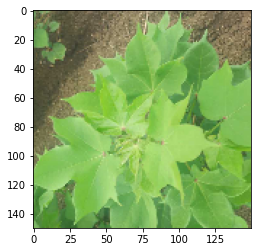

In [ ]:
predict_it('/content/drive/MyDrive/DL/CottonDisease/val/fresh cotton plant/dsd (141)_iaip.jpg')

The leaf is fresh cotton leaf


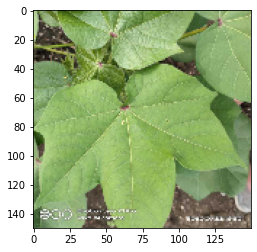

In [ ]:
predict_it('/content/drive/MyDrive/DL/CottonDisease/test/fresh cotton leaf/d (133)_iaip.jpg')

Validation

In [ ]:
validation_path = '/content/drive/MyDrive/DL/CottonDisease/val'

In [ ]:
valid_data = test_datagen.flow_from_directory(validation_path, target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')
valid_data

Found 253 images belonging to 4 classes.


In [ ]:
predicted = model.predict(valid_data[0][0])
predicted

array([[2.6420841e-04, 3.4153956e-04, 9.9919933e-01, 1.9504596e-04],
       [8.9911628e-06, 9.9653083e-01, 1.4963442e-05, 3.4451892e-03],
       [4.3298026e-08, 9.9577785e-01, 6.4401074e-06, 4.2156368e-03],
       [1.1598203e-04, 1.6184082e-03, 9.9681723e-01, 1.4483272e-03],
       [2.5895940e-07, 9.9944037e-01, 4.9171814e-07, 5.5886240e-04],
       [7.4149249e-03, 6.7848638e-02, 8.1425935e-02, 8.4331053e-01],
       [2.2522577e-03, 5.4083449e-01, 1.1127464e-03, 4.5580047e-01],
       [8.0308375e-05, 9.7531235e-01, 2.9952591e-04, 2.4307759e-02],
       [9.9999774e-01, 7.8739056e-08, 1.3788784e-06, 7.2631440e-07],
       [9.0060502e-01, 9.1871340e-03, 8.4822588e-02, 5.3851996e-03],
       [9.9999928e-01, 3.4135983e-08, 7.1665113e-07, 3.8969720e-08],
       [9.5860207e-07, 9.9972171e-01, 4.2259839e-07, 2.7692210e-04],
       [9.8776150e-01, 2.3438298e-04, 1.1928882e-02, 7.5195676e-05],
       [3.2020593e-04, 1.6168253e-02, 4.3412843e-03, 9.7917020e-01],
       [7.7423675e-04, 4.2939762e-

In [ ]:
actual=[]
for i in valid_data[0][1]:
  actual.append(np.argmax(i))
predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual,predict)

0.96875